In [48]:
import pandas as pd
import numpy as np 
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, plot_confusion_matrix
#stemmer=PorterStemmer()

In [49]:
#!pip install contractions
import contractions
from copy import deepcopy

In [50]:
#from google.colab import drive
#drive.mount('/content/drive')

In [51]:
df = pd.read_csv('data.csv')#'/content/drive/MyDrive/ml project/train.csv')
#df_ = pd.read_csv('/content/drive/MyDrive/ml project/data.csv')

In [52]:
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to /home/bharat/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
def preprocess1(a):
    x = re.sub('[^a-zA-Z]', ' ',a)
    x=a.lower()#convert to lower case
    x=contractions.fix(x)#contraction, eg. I'll -> I will
    #x= x.encode("ascii", "ignore").decode() # non ascii chars
    #x = re.sub(r'\s+[a-zA-Z]\s+', ' ', x) # single characters 
    #x = re.sub(r'\^[a-zA-Z]\s+', ' ', x) # single char at first
    #x = re.sub(r'[0-9]', ' ', x) # digit
    x=re.findall(r"\w+",x)
    return x

In [54]:
def preprocess2(a):
    x=[stemmer.stem(i) for i in a if i not in stop_words]
    return ' '.join(x)

In [55]:
def preprocess(text):
    return preprocess2(preprocess1(text))

In [56]:
def data_processing(df):
    main=deepcopy(df)
    main['Body'] = main['Body'].fillna('')
    return main

In [57]:
def data_plot(main):
    print(main['Label'].value_counts())
    main['Label'].value_counts().plot(kind='pie', title='Label Counts Percentage', autopct='%1.2f%%')
    plt.show()

In [58]:
def final_data(main):
    return (main['Body'] +" "+ main['Headline']).apply(preprocess)

In [59]:
def x_y_train(X,main):
    train_x = TfidfVectorizer().fit_transform(list(X))
    train_y=list(main['Label'])
    return train_x,train_y

In [60]:
def x_y_data(df):  
    main=data_processing(df)
    X=final_data(main)
    return x_y_train(X,main),main

In [61]:
[X,Y],main=x_y_data(df)
train_x,test_x, train_y, test_y = train_test_split(X, Y,test_size=0.2)
#len(train_x), len(test_x)

In [62]:
df.isnull().sum()

URLs         0
Headline     0
Body        21
Label        0
dtype: int64

In [63]:
main.isnull().sum() 

URLs        0
Headline    0
Body        0
Label       0
dtype: int64

0    2137
1    1872
Name: Label, dtype: int64


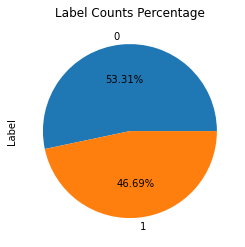

In [64]:
data_plot(main)

In [65]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,ComplementNB,BernoulliNB,CategoricalNB
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC

In [66]:
from pickle import load,dump
import os

In [67]:
def save_model(model,name):
    try:
        os.mkdir("models")
    except:
        print()
        
    dump(model,open("models/"+name,"wb+",))
    try:
        save_coef(model)
    except:
        print("no coef")

In [68]:
def read_model(name):
    return load(open("models/"+name,"rb"))

In [69]:
def save_coef(model):
    if model.coef_ is False:
        return
    try:
        os.mkdir("coefs")
    except:
        print()
    
    f=open("coefs/"+str(model)+"_coef","ab+")
    dump(model.coef_,f)
    f.close()

In [70]:
def calculate_for_train(Model,train_x,train_y):
    model=Model.fit(train_x,train_y)
    y_pred = model.predict(train_x)

    
    print(f"Accuracy : {accuracy_score(train_y, y_pred)}")
    print(f"F1-Score : {f1_score(train_y, y_pred)}")

    try:
        plot_confusion_matrix(model, train_x, train_y, display_labels=['Reliable', 'Unreliable'])
        plt.show()
    except:
        print("no confusion matrix")
    return model


In [71]:
def calculate_for_testing(model,train_x,train_y):
    y_pred = model.predict(train_x)
    print(f"Accuracy : {accuracy_score(train_y, y_pred)}")
    print(f"F1-Score : {f1_score(train_y, y_pred)}")

    plot_confusion_matrix(model, train_x, train_y, display_labels=['Reliable', 'Unreliable'])
    plt.show()
    

Accuracy : 0.996570003118179
F1-Score : 0.9963074857334676


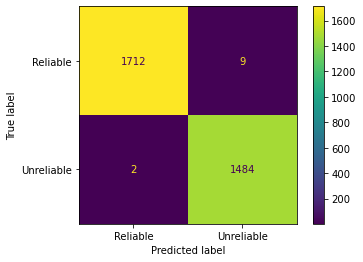

no coef


In [72]:
model_SVC=calculate_for_train(SVC(kernel="sigmoid"),train_x,train_y)
save_model(model_SVC,"svm")

Accuracy : 0.9875311720698254
F1-Score : 0.9870801033591732


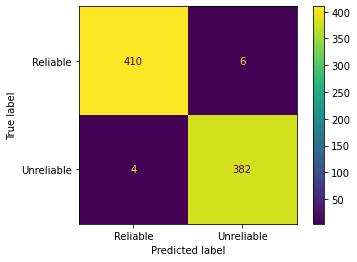

In [73]:
calculate_for_testing(model_SVC,test_x,test_y)

Accuracy : 0.9055191768007483
F1-Score : 0.8955532574974148


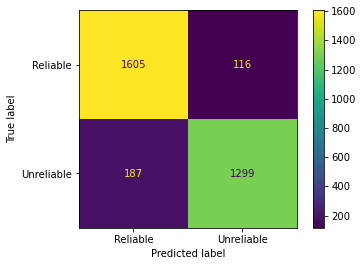


no coef


In [74]:
model_KNeighborsClassifier=calculate_for_train(KNeighborsClassifier(n_neighbors=130),train_x,train_y)
save_model(model_KNeighborsClassifier,"knn")

Accuracy : 0.9089775561097256
F1-Score : 0.903054448871182


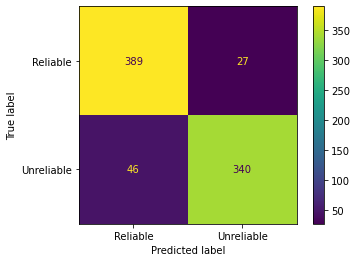

In [75]:
calculate_for_testing(read_model("knn"),test_x,test_y)

Accuracy : 1.0
F1-Score : 1.0


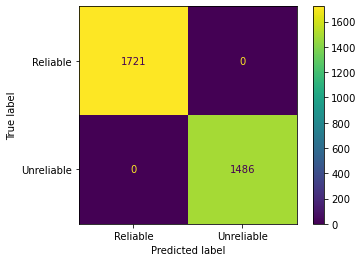


no coef


In [76]:

model_dt_gini=calculate_for_train(DecisionTreeClassifier(criterion='gini'),train_x,train_y)
save_model(model_dt_gini,"dt_gini")

Accuracy : 0.9576059850374065
F1-Score : 0.9558441558441558


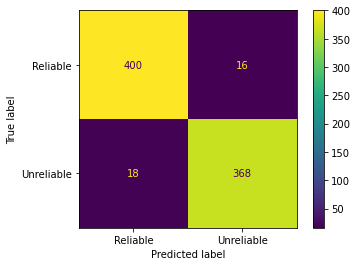

In [77]:
calculate_for_testing(read_model("dt_gini"),test_x,test_y)

Accuracy : 1.0
F1-Score : 1.0


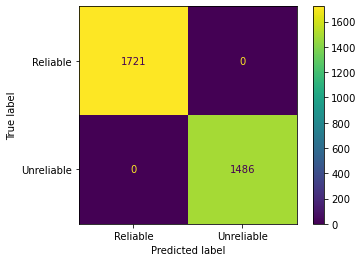


no coef


In [78]:

model_dt_entropy=calculate_for_train(DecisionTreeClassifier(criterion='entropy'),train_x,train_y)
save_model(model_dt_entropy,"dt_entropy")

Accuracy : 0.956359102244389
F1-Score : 0.954367666232073


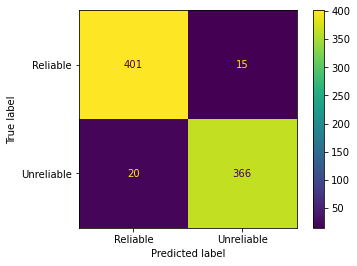

In [79]:
calculate_for_testing(read_model("dt_entropy"),test_x,test_y)

Accuracy : 1.0
F1-Score : 1.0


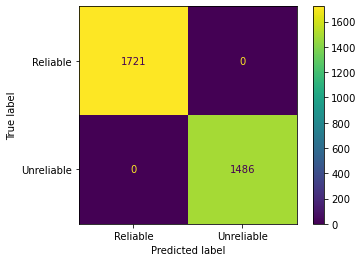


no coef


In [80]:

model_rf_gini=calculate_for_train(RandomForestClassifier(criterion='gini'),train_x,train_y)
save_model(model_rf_gini,"rf_gini")

Accuracy : 0.9675810473815462
F1-Score : 0.9670886075949366


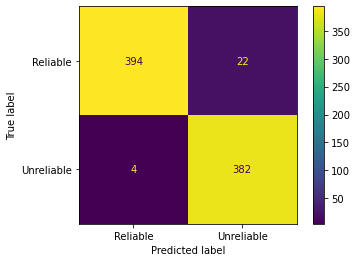

In [81]:
calculate_for_testing(read_model("rf_gini"),test_x,test_y)

Accuracy : 1.0
F1-Score : 1.0


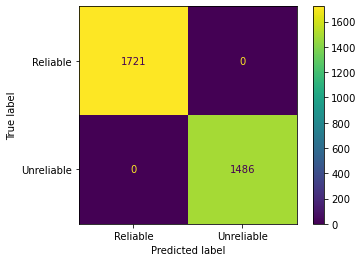


no coef


In [82]:

model_rf_entropy=calculate_for_train(RandomForestClassifier(criterion='entropy'),train_x,train_y)
save_model(model_rf_entropy,"rf_entropy")

Accuracy : 0.9713216957605985
F1-Score : 0.9708491761723701


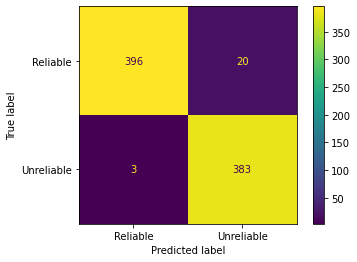

In [83]:
calculate_for_testing(read_model("rf_entropy"),test_x,test_y)

Accuracy : 0.9922045525413159
F1-Score : 0.9916022841787034


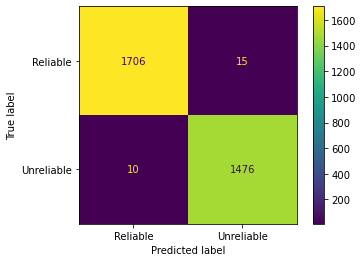

In [84]:
model_LogisticRegression=calculate_for_train(LogisticRegression(),train_x,train_y)
save_model(model_LogisticRegression,"log_reg")

Accuracy : 0.9763092269326683
F1-Score : 0.975483870967742


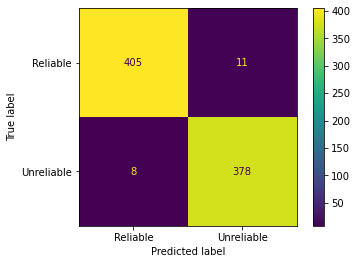

In [85]:
calculate_for_testing(read_model("log_reg"),test_x,test_y)

Accuracy : 0.9844091050826318
F1-Score : 0.9828884325804244


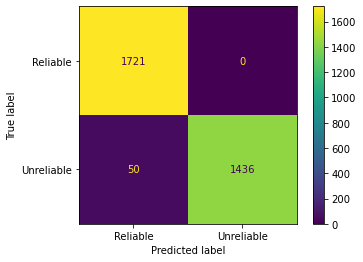


no coef


In [86]:
model_GaussianNB=calculate_for_train(GaussianNB(),train_x.toarray(),train_y)
save_model(model_GaussianNB,"g_nb")

Accuracy : 0.8952618453865336
F1-Score : 0.8920308483290489


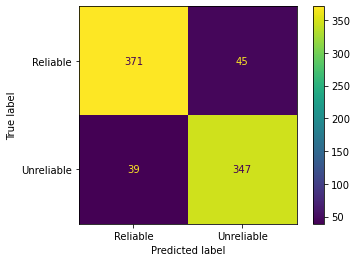

In [87]:
calculate_for_testing(read_model("g_nb"),test_x.toarray(),test_y)

Accuracy : 0.9619582164016215
F1-Score : 0.9592790387182909


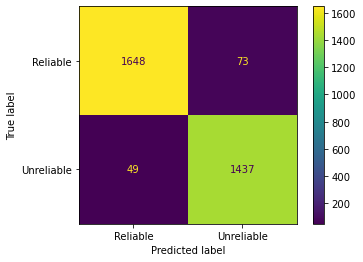

/home/bharat/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


In [88]:
model_MultinomialNB=calculate_for_train(MultinomialNB(),train_x,train_y)
save_model(model_MultinomialNB,"m_nb")

Accuracy : 0.9451371571072319
F1-Score : 0.9435897435897436


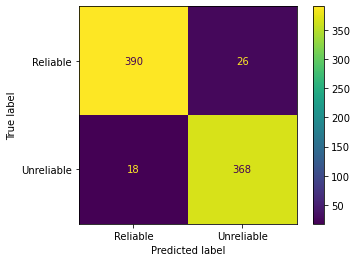

In [89]:
calculate_for_testing(read_model("m_nb"),test_x,test_y)

Accuracy : 0.8574992204552542
F1-Score : 0.834119782214156


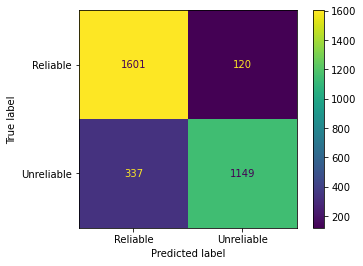

/home/bharat/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


In [90]:
model_BernoulliNB=calculate_for_train(BernoulliNB(),train_x,train_y)
save_model(model_BernoulliNB,"b_nb")

Accuracy : 0.8266832917705735
F1-Score : 0.8066759388038943


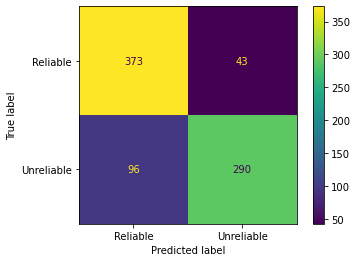

In [91]:
calculate_for_testing(read_model("b_nb"),test_x,test_y)

Accuracy : 0.8574992204552542
F1-Score : 0.834119782214156


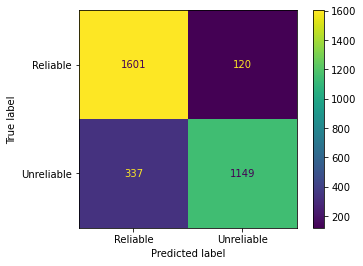

/home/bharat/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


In [92]:
model_=calculate_for_train(BernoulliNB(),train_x,train_y)
save_model(model_BernoulliNB,"b_nb")